---
# EXTRACCIÓN
---

---
## IMPORTAR PAQUETES
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

import sqlalchemy as sa

import re

pd.options.display.float_format = '{:.2f}'.format


%config IPCompleter.greedy=True # Activa el autocompletar avanzado en Jupyter

from IPython.display import display, HTML, Image
display(HTML("""<style> th{ text-align: center !important; font-weight: bold !important; } td{ text-align: center !important; }</style>"""))

---
## CREAR LOS DATASETS INICIALES / CARGA O IMPORTACIÓN DE DATOS
---
- Ponemos los datos originales en la carpeta '/data/raw'
- Tenemos una base de datos con extensión .db, es una base de datos de SQLite.

['2019-Dec', '2019-Nov', '2019-Oct', '2020-Feb', '2020-Jan']


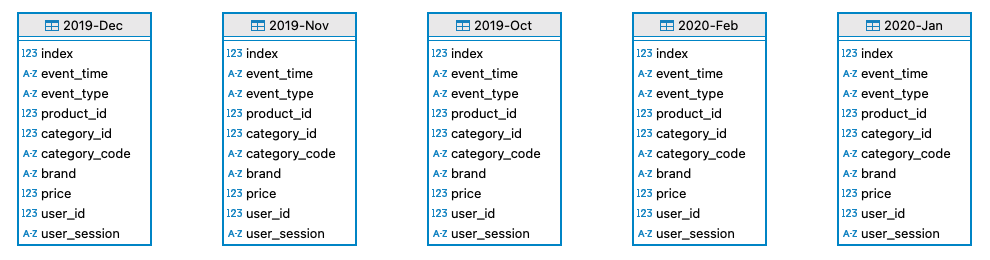

In [2]:
## Creamos conexion a la base de datos
con = sa.create_engine('sqlite:///../data/raw/ecommerce.db')

# Visualizamos las tablas de la base de datos
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
print(tablas)

# Visualizamos la imagen de las tablas de la base de datos
display(Image('../images/Tablas ecommerce.png'))

In [3]:
# Importamos las tablas de la base de datos
oct = pd.read_sql('2019-Oct', con)
nov = pd.read_sql('2019-Nov', con)
dic = pd.read_sql('2019-Dec', con)
ene = pd.read_sql('2020-Jan', con)
feb = pd.read_sql('2020-Feb', con)

print(f"Total de registros y columnas en la tabla de Octubre: {oct.shape[0]} filas y {oct.shape[1]} columnas")
print(f"Total de registros y columnas en la tabla de Noviembre: {nov.shape[0]} filas y {nov.shape[1]} columnas")
print(f"Total de registros y columnas en la tabla de Diciembre: {dic.shape[0]} filas y {dic.shape[1]} columnas")
print(f"Total de registros y columnas en la tabla de Enero: {ene.shape[0]} filas y {ene.shape[1]} columnas")
print(f"Total de registros y columnas en la tabla de Febrero: {feb.shape[0]} filas y {feb.shape[1]} columnas")
print(f"\nTotal de registros en todas las tablas: {oct.shape[0] + nov.shape[0] + dic.shape[0] + ene.shape[0] + feb.shape[0]} filas")

# Guardamos las tablas en un archivo CSV
oct.to_csv('../data/originals/2019_Oct.csv', index=False)
nov.to_csv('../data/originals/2019_Nov.csv', index=False)
dic.to_csv('../data/originals/2019_Dic.csv', index=False)
ene.to_csv('../data/originals/2020_Ene.csv', index=False)
feb.to_csv('../data/originals/2020_Feb.csv', index=False)

print("\nLas tablas han sido guardadas en archivos CSV exitosamente en 'data/originals/'")

Total de registros y columnas en la tabla de Octubre: 407925 filas y 10 columnas
Total de registros y columnas en la tabla de Noviembre: 462833 filas y 10 columnas
Total de registros y columnas en la tabla de Diciembre: 351304 filas y 10 columnas
Total de registros y columnas en la tabla de Enero: 443224 filas y 10 columnas
Total de registros y columnas en la tabla de Febrero: 429790 filas y 10 columnas

Total de registros en todas las tablas: 2095076 filas

Las tablas han sido guardadas en archivos CSV exitosamente en 'data/originals/'


In [4]:
### La estructura de variables en todas las tablas es la misma, integramos las tablas con una apilación vertical

# Unir las tablas con apilación vertical
data = pd.concat([oct, nov, dic, ene, feb], axis = 0)
print("Las tablas han sido unidas con apilación vertical")

# Guardar el DataFrame combinado en un CSV
data.to_csv("../data/originals/datos_integrados.csv", index=False)
print("Las tablas han sido integradas y guardadas en 'data/originals/' con el nombre 'datos_integrados.csv'")

# Creamos una copia del DataFrame
df = data.copy()
print("Se ha creado una copia del DataFrame data para trabajar")

# Guardar el DataFrame de trabajo
df.to_csv("../data/originals/ecommerce.csv", index=False)
print("El DataFrame de trabajo ha sido guardado en 'data/originals/' con el nombre 'ecommerce.csv'")

print(f"\nTotal de registros y columnas en el DataFrame despues de la Integración: {df.shape[0]} filas y {df.shape[1]} columnas")

# Visualizamos los primeros registros del DataFrame original 'data'
print("\n----------------------------------------------------------------------")
print("Visualizamos los primeros registros del DataFrame original 'data'")
display(data)

# Visualizamos los primeros registros del DataFrame de trabajo 'df'
print("\n----------------------------------------------------------------------")
print("Visualizamos los primeros registros del DataFrame de trabajo 'df'")
display(df)

Las tablas han sido unidas con apilación vertical
Las tablas han sido integradas y guardadas en 'data/originals/' con el nombre 'datos_integrados.csv'
Se ha creado una copia del DataFrame data para trabajar
El DataFrame de trabajo ha sido guardado en 'data/originals/' con el nombre 'ecommerce.csv'

Total de registros y columnas en el DataFrame despues de la Integración: 2095076 filas y 10 columnas

----------------------------------------------------------------------
Visualizamos los primeros registros del DataFrame original 'data'


,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,68,2019-10-01 00:01:46 UTC,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,72,2019-10-01 00:01:55 UTC,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,95,2019-10-01 00:02:50 UTC,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,122,2019-10-01 00:03:41 UTC,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,124,2019-10-01 00:03:44 UTC,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...,...
429785,4156660,2020-02-29 23:58:49 UTC,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,4156663,2020-02-29 23:58:57 UTC,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,4156668,2020-02-29 23:59:05 UTC,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,4156675,2020-02-29 23:59:28 UTC,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d



----------------------------------------------------------------------
Visualizamos los primeros registros del DataFrame de trabajo 'df'


,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,68,2019-10-01 00:01:46 UTC,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,72,2019-10-01 00:01:55 UTC,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,95,2019-10-01 00:02:50 UTC,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,122,2019-10-01 00:03:41 UTC,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,124,2019-10-01 00:03:44 UTC,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...,...
429785,4156660,2020-02-29 23:58:49 UTC,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,4156663,2020-02-29 23:58:57 UTC,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,4156668,2020-02-29 23:59:05 UTC,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,4156675,2020-02-29 23:59:28 UTC,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


Ejecutar en conda 'Converting notebook 01_extraction.ipynb to script' para que cree el archivo .py